# **The Abalone Problem Statement**
The age of an abalone can be found by cutting its shell and counting the number of rings on the shell. In the Abalone Dataset, you can find the age measurements of a large number of abalones along with a lot of other physical measurements.

The goal of the project is to develop a model that can predict the age of an abalone based purely on the other physical measurements. This would allow researchers to estimate the abalone’s age without having to cut its shell and count the rings.

You’ll be applying a kNN to find the closest prediction score possible.

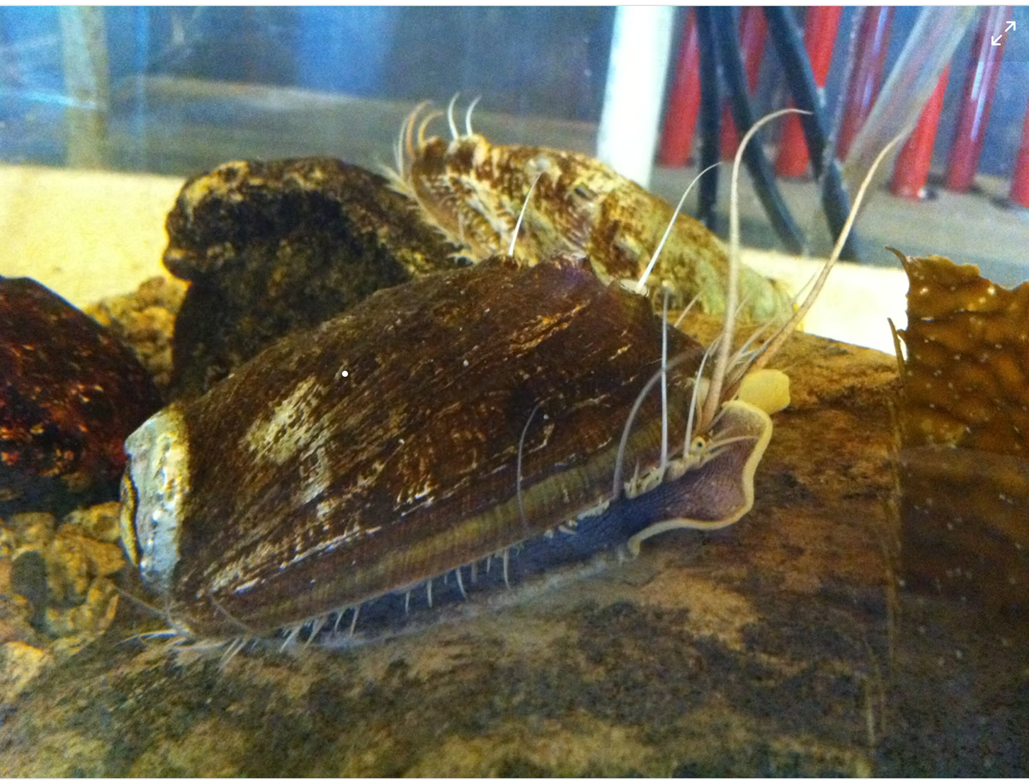

In [ ]:
import pandas as pd

# URL for the Abalone dataset from the UCI Machine Learning Repository
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.data"
#columns = ['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight', 'Viscera weight', 'Shell weight', 'Rings']

# Reading the CSV data into a pandas DataFrame
abalone = pd.read_csv(url, header=None)

# Display the first few rows of the dataset
abalone.head()

In [ ]:
abalone.columns = [
    "Sex",
    "Length",
    "Diameter",
    "Height",
    "Whole weight",
    "Shucked weight",
    "Viscera weight",
    "Shell weight",
    "Rings",
]

In [ ]:
abalone.head()

**The imported data should now be more understandable. But there’s one other thing that you should do: You should remove the Sex column. The goal of the current exercise is to use physical measurements to predict the age of the abalone. Since sex is not a purely physical measure, you should remove it from the dataset. You can delete the Sex column using .drop:**

In [ ]:
abalone = abalone.drop("Sex", axis=1)

In [ ]:
abalone.head()

# **Descriptive Statistics From the Abalone Dataset**

### **Histogram Plot:**
When defining the number of bins, you generally try to have neither too many observations per bin nor too few. Too few bins can hide certain patterns, while too many bins can make the histogram lack smoothness. You can see the histogram in the following graph:

In [ ]:
import matplotlib.pyplot as plt
abalone["Rings"].hist(bins=15)
plt.show()

# **Correlation:**

A second relevant exploration is to find out which of the variables, if any, have a strong correlation with the age. A strong correlation between an independent variable and your goal variable would be a good sign, as this would confirm that physical measurements and age are related.

You can observe the complete correlation matrix in correlation_matrix. The most important correlations are the ones with the target variable Rings.

In [ ]:
abalone.corr()

In [ ]:
correlation_matrix=abalone.corr()
correlation_matrix["Rings"]

In [ ]:
X = abalone.drop("Rings", axis=1)
X = X.values
y = abalone["Rings"]
y = y.values

### **Splitting Data Into Training and Test Sets for Model Evaluation**
**Training data** is used to fit the model. For kNN, this means that the training data will be used as neighbors.

**Test data** is used to evaluate the model. It means that you’ll make predictions for the number of rings of each of the abalones in the test data and compare those results to the known true number of rings.

The **random_state** is a parameter that allows you to obtain the same results every time the code is run. train_test_split() makes a random split in the data, which is problematic for reproducing the results. Therefore, it’s common to use random_state. The choice of value in random_state is arbitrary.

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12345)

In [ ]:
from sklearn.preprocessing import StandardScaler

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### **Fitting a kNN Regression in scikit-learn to the Abalone Dataset**

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
knn_model = KNeighborsRegressor(n_neighbors=3)

In [ ]:
knn_model.fit(X_train_scaled, y_train)

## **Using scikit-learn to Inspect Model Fit**

To start, you can evaluate the prediction error on the training data. This means that you use the training data for prediction, so you know that the result should be relatively good.

In [ ]:
from sklearn.metrics import mean_squared_error
from math import sqrt
train_preds = knn_model.predict(X_train_scaled)
mse = mean_squared_error(y_train, train_preds)
rmse = sqrt(mse)
rmse

You compute the RMSE on the training data for now. For a more realistic result, you should evaluate the performances on data that aren’t included in the model. This is why you kept the test set separate for now. You can evaluate the predictive performances on the test set with the same function as before:

In [ ]:
y_pred = knn_model.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
rmse = sqrt(mse)
rmse

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(range(len(y_test)), y_test, color='blue', label='Actual Data')
plt.scatter(range(len(y_pred)), y_pred, color='red', label='Predicted Data', alpha=0.7)
plt.xlabel('Sample Index')
plt.ylabel('Rings')
plt.title('Actual vs Predicted Rings using KNN Regression')
plt.legend()
plt.show()

# Optional: Print the mean squared error for evaluation
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse:.2f}')

# **Tune and Optimize kNN in Python Using scikit-learn**

### **Improving kNN Performances in scikit-learn Using GridSearchCV**
Until now, you’ve always worked with k=3 in the kNN algorithm, but the best value for k is something that you need to find empirically for each dataset.

When you use few neighbors, you have a prediction that will be much more variable than when you use more neighbors:

If you use one neighbor only, the prediction can strongly change from one point to the other. When you think about your own neighbors, one may be quite different from the others. If you lived next to an outlier, your 1-NN prediction would be wrong.

If you have multiple data points, the impact of one extremely different neighbor will be much less.

If you use too many neighbors, the prediction of each point risks being very close. Let’s say that you use all neighbors for a prediction. In that case, every prediction would be the same.

To find the best value for k, you’re going to use a tool called **GridSearchCV**. This is a tool that is often used for tuning hyperparameters of machine learning models. In your case, it will help by automatically finding the best value of k for your dataset.

GridSearchCV is available in scikit-learn, and it has the benefit of being used in almost the exact same way as the scikit-learn models:

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid to search over
parameters = {
    "n_neighbors": range(1, 50),
    "weights": ["uniform", "distance"]  # Adding the 'weights' parameter as another feature
}

# Setting up the GridSearchCV with KNeighborsRegressor
gridsearch = GridSearchCV(KNeighborsRegressor(), parameters)  # 'cv' is for cross-validation
gridsearch.fit(X_train_scaled, y_train)

# Displaying the best parameters found by GridSearchCV
print("Best parameters found: ", gridsearch.best_params_)
#print("Best cross-validated score: ", gridsearch.best_score_)


In [ ]:
train_preds_grid = gridsearch.predict(X_train_scaled)
train_mse = mean_squared_error(y_train, train_preds_grid)
train_rmse = sqrt(train_mse)
test_preds_grid = gridsearch.predict(X_test_scaled)
test_mse = mean_squared_error(y_test, test_preds_grid)
test_rmse = sqrt(test_mse)


In [ ]:
train_rmse

In [ ]:
print("Training Predictions vs Actual Values:")
print(train_preds_grid[:10])  # Display first 10 predictions
print(y_train[:10])           # Display first 10 actual values

In [ ]:
test_rmse

In [ ]:
print("Test Predictions vs Actual Values:")
print(test_preds_grid[:10])
print(y_test[:10])

In [ ]:
from sklearn.model_selection import GridSearchCV
parameters = {"n_neighbors": range(1, 50)}
gridsearch = GridSearchCV(KNeighborsRegressor(), parameters)
gridsearch.fit(X_train_scaled, y_train)
GridSearchCV(estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': range(1, 50)})

In [ ]:
test_preds_grid = gridsearch.predict(X_test_scaled)
test_mse = mean_squared_error(y_test, test_preds_grid)
test_rmse = sqrt(test_mse)
test_rmse

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

k_range = range(1, 21)
train_rmse_list = []
test_rmse_list = []

for k in k_range:
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    train_preds = knn.predict(X_train_scaled)
    test_preds = knn.predict(X_test_scaled)
    train_rmse_list.append(np.sqrt(mean_squared_error(y_train, train_preds)))
    test_rmse_list.append(np.sqrt(mean_squared_error(y_test, test_preds)))

plt.plot(k_range, train_rmse_list, label='Train RMSE')
plt.plot(k_range, test_rmse_list, label='Test RMSE')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('RMSE')
plt.legend()
plt.title('RMSE vs. Number of Neighbors')
plt.show()
